In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [7]:
def plot(ax, dataset, index):
    datasize = pd.read_csv(f'../data/{dataset}/targets.csv').shape[0]
    df = pd.read_csv(f'../loss_csvs/{dataset}.csv')
    n_features = pd.read_csv(f'../data/{dataset}/features.csv').shape[1]

    # Define method order and standardize method names
    desired_order = ['constant', 'knn', 'linear', 'mmit', 'mmif', 'aft_xgb', 'mlp']
    df['method'] = df['method'].replace({'rf': 'mmif', 'aft_xgboost_original': 'aft_xgb'})
    df = df[df['method'].isin(desired_order)]

    # Compute log loss
    df['loss'] = np.log10(df['loss'] + 1e-10)

    # Group by method and calculate mean and std of loss
    df['method'] = pd.Categorical(df['method'], categories=desired_order, ordered=True)
    grouped = df.groupby('method', observed=False)['loss'].agg(['mean', 'std'])

    # Plot mean loss with error bars
    for i, method in enumerate(grouped.index):
        ax.errorbar(
            grouped['mean'].iloc[i], method,
            xerr= grouped['std'].iloc[i], fmt='o',
            capsize=5, capthick=2, elinewidth=2,
            linestyle='none', color='black', ecolor='black'
        )

    # Set title with dataset information
    ax.set_title(f"{dataset} ({datasize} rows - {n_features} features)", color='black', fontsize=10)

    # Adjust y-axis limits
    ax.set_ylim(-0.8, len(desired_order) - 0.2)

    # Format x-axis labels
    ax.tick_params(axis='x', labelsize=10, colors='black')

    # Set y-axis labels conditionally
    if index % 3 == 0:
        ax.set_yticks(grouped.index)
        ax.set_yticklabels(grouped.index, color='black')
    else:
        ax.set_yticklabels([])
    ax.set_xlabel('log test squared hinge error', color='black', fontsize=10)

    # Apply black grid lines
    ax.grid(True, linestyle='--', linewidth=0.5, color='black')

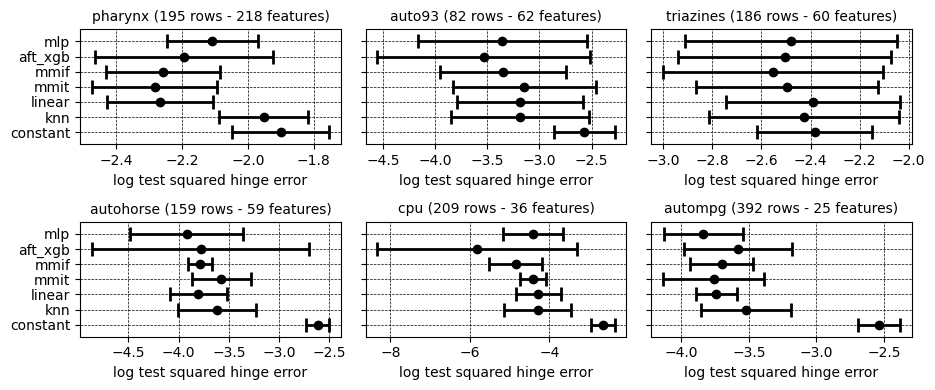

In [9]:
datasets = ['pharynx', 'auto93', 'triazines', 'autohorse', 'cpu', 'autompg']

# Create subplots
num_datasets = len(datasets)
fig, axes = plt.subplots(
    nrows=(num_datasets // 3) + (num_datasets % 3 > 0),
    ncols=3,
    figsize=(9.5, 2 *(num_datasets // 3) )
)

# Ensure axes is a 2D numpy array
axes = np.array(axes).reshape(-1, 3)

# Plot each dataset
for i, dataset in enumerate(datasets):
    row, col = divmod(i, 3)
    # Assume plot() is a function that plots on the given axis
    plot(axes[row, col], dataset, i)

# Remove unused subplots
for j in range(num_datasets, axes.size):
    fig.delaxes(axes.flat[j])  # Now axes.flat works correctly

# Adjust layout
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout()
plt.savefig("pdfs/results_real_1.pdf")
plt.show()

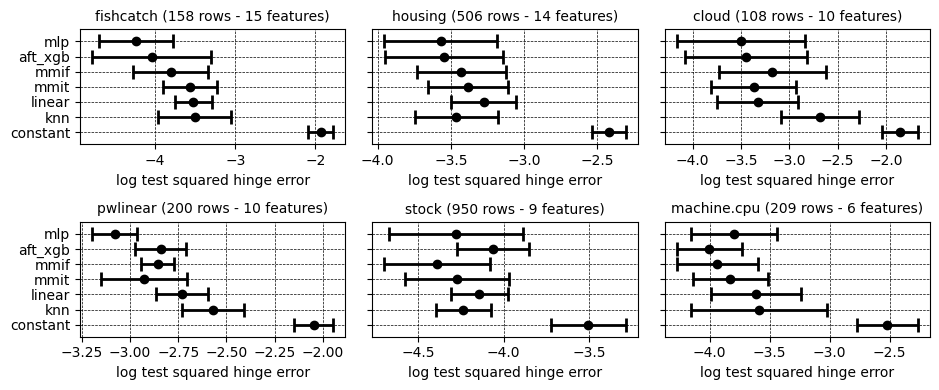

In [10]:
datasets = ['fishcatch', 'housing', 'cloud', 'pwlinear', 'stock', 'machine.cpu']

# Create subplots
num_datasets = len(datasets)
fig, axes = plt.subplots(
    nrows=(num_datasets // 3) + (num_datasets % 3 > 0),
    ncols=3,
    figsize=(9.5, 2 *(num_datasets // 3) )
)

# Ensure axes is a 2D numpy array
axes = np.array(axes).reshape(-1, 3)

# Plot each dataset
for i, dataset in enumerate(datasets):
    row, col = divmod(i, 3)
    # Assume plot() is a function that plots on the given axis
    plot(axes[row, col], dataset, i)

# Remove unused subplots
for j in range(num_datasets, axes.size):
    fig.delaxes(axes.flat[j])  # Now axes.flat works correctly

# Adjust layout
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.tight_layout()
plt.savefig("pdfs/results_real_2.pdf")
plt.show()